In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns

# Let's build neural network

In [ ]:
class BasicNN(nn.Module):

    def __init__(self):    #initialization method for the parent class (nn.Module)  
        super().__init__() #call initialize method

        #initialize weights and biases 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input): #forward pass
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output


In [ ]:
# input data
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [ ]:
model = BasicNN()
output_values = model(input_doses)

Text(0, 0.5, 'Effectiveness')

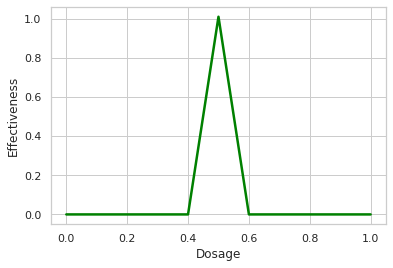

In [ ]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')

**Let's pretend we don't already know the optimal value for final bias.**

In [ ]:
class BasicNN_train(nn.Module):

    def __init__(self):    #initialization method for the parent class (nn.Module)  
        super().__init__() #call initialize method

        #initialize weights and biases 
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.70), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self, input): #forward pass
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_bottom_relu_output + scaled_top_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output

In [ ]:
model = BasicNN_train()
output_values = model(input_doses)

Text(0, 0.5, 'Effectiveness')

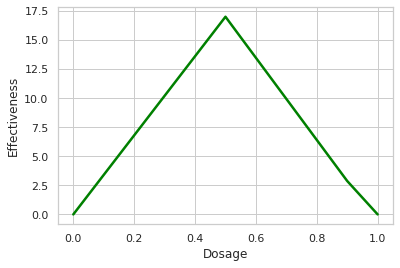

In [ ]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')

b(final) should be optimized, thus, we need training data.

In [ ]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1, 0.])

Now, we are ready to optimize the last bias term.

In [ ]:
optimizer = SGD(model.parameters(), lr=0.1)

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)
        loss = (output_i - label_i)**2
        loss.backward()

        total_loss = total_loss + float(loss)

    if (total_loss < 0.0001):
        print("Number of steps: " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + " Final bias: " + str(model.final_bias.data) + '\n')


Final bias, before optimization: tensor(0.)

Step: 0 Final bias: tensor(-3.2020)

Step: 1 Final bias: tensor(-5.7636)

Step: 2 Final bias: tensor(-7.8129)

Step: 3 Final bias: tensor(-9.4523)

Step: 4 Final bias: tensor(-10.7638)

Step: 5 Final bias: tensor(-11.8131)

Step: 6 Final bias: tensor(-12.6525)

Step: 7 Final bias: tensor(-13.3240)

Step: 8 Final bias: tensor(-13.8612)

Step: 9 Final bias: tensor(-14.2909)

Step: 10 Final bias: tensor(-14.6348)

Step: 11 Final bias: tensor(-14.9098)

Step: 12 Final bias: tensor(-15.1298)

Step: 13 Final bias: tensor(-15.3059)

Step: 14 Final bias: tensor(-15.4467)

Step: 15 Final bias: tensor(-15.5594)

Step: 16 Final bias: tensor(-15.6495)

Step: 17 Final bias: tensor(-15.7216)

Step: 18 Final bias: tensor(-15.7793)

Step: 19 Final bias: tensor(-15.8254)

Step: 20 Final bias: tensor(-15.8623)

Step: 21 Final bias: tensor(-15.8919)

Step: 22 Final bias: tensor(-15.9155)

Step: 23 Final bias: tensor(-15.9344)

Step: 24 Final bias: tensor(-15.9

**The optimal value for final_bias is -16.0019, which is pretty close to -16, the optimal value we used originally.**

Text(0, 0.5, 'Effectiveness')

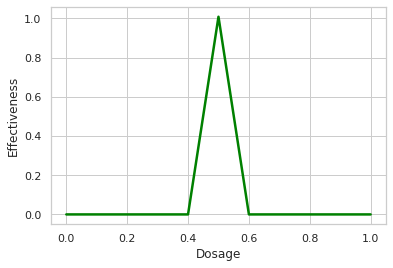

In [ ]:
output_values = model(input_doses)

sns.set(style='whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
plt.xlabel('Dosage')
plt.ylabel('Effectiveness')

**This is what we get, which shows that the neural network does exactly what we expect**